## Seaborn package

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
sns.__version__

'0.12.2'

In [4]:
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')       # 여객 운송 데이터
mpg = sns.load_dataset('mpg')               # Mile Per Gallon 데이터

- 1차원 분포

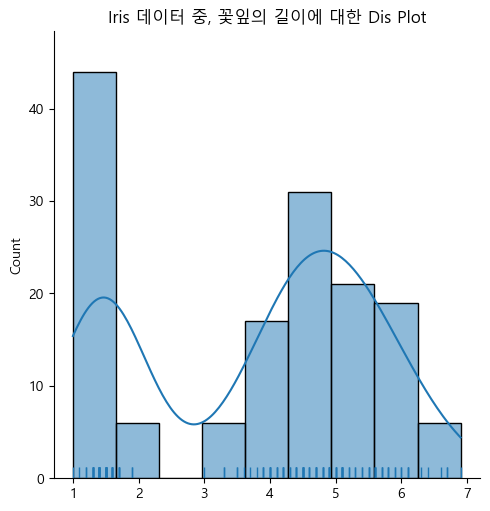

In [16]:
# displot(distribution plot)
x = iris.petal_length.values
sns.displot(x, kde=True, rug=True)  # kde = 곡선 그래프, rug = 아래 잔디같이 생긴 그래프
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Dis Plot")
plt.show()

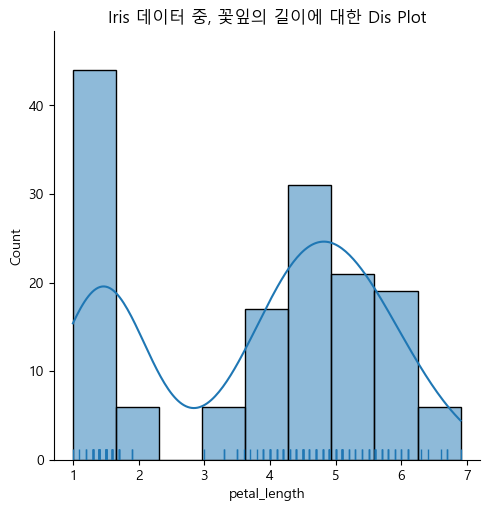

In [5]:
sns.displot(x='petal_length', kde=True, rug=True, data=iris)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Dis Plot")
plt.show()

- 카운트 플롯

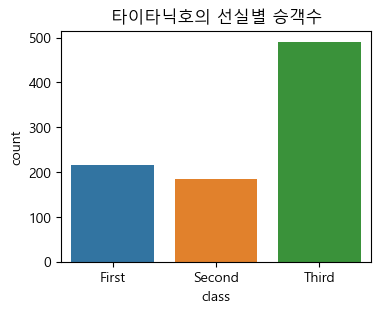

In [7]:
plt.figure(figsize=(4, 3))
sns.countplot(data=titanic, x='class')
plt.title('타이타닉호의 선실별 승객수')
plt.show()

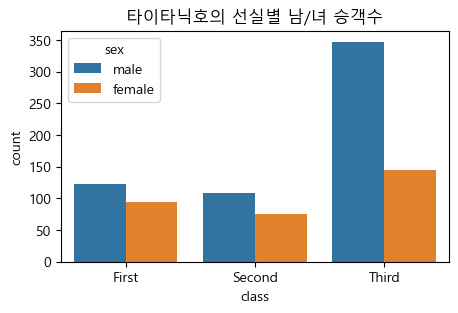

In [10]:
plt.figure(figsize=(5, 3))
sns.countplot(data=titanic, x='class', hue='sex')  # palette='plasma'와 같이 colormap을 지정할 수 있음. 
plt.title('타이타닉호의 선실별 남/녀 승객수')
plt.show()

- 다차원 실수 데이터

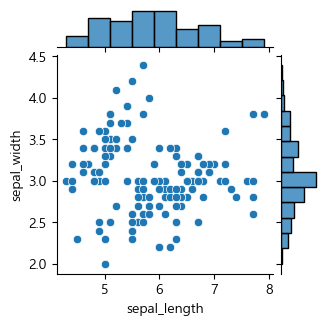

In [11]:
# joint plot
fig = sns.jointplot(data=iris, x='sepal_length', y='sepal_width')
fig.fig.set_size_inches(3, 3)
plt.show()

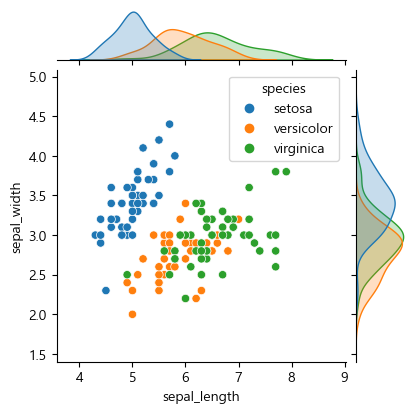

In [12]:
# joint plot을 좀더 세련되게
fig = sns.jointplot(data=iris, x='sepal_length', y='sepal_width', hue='species')
fig.fig.set_size_inches(4, 4)
plt.show()

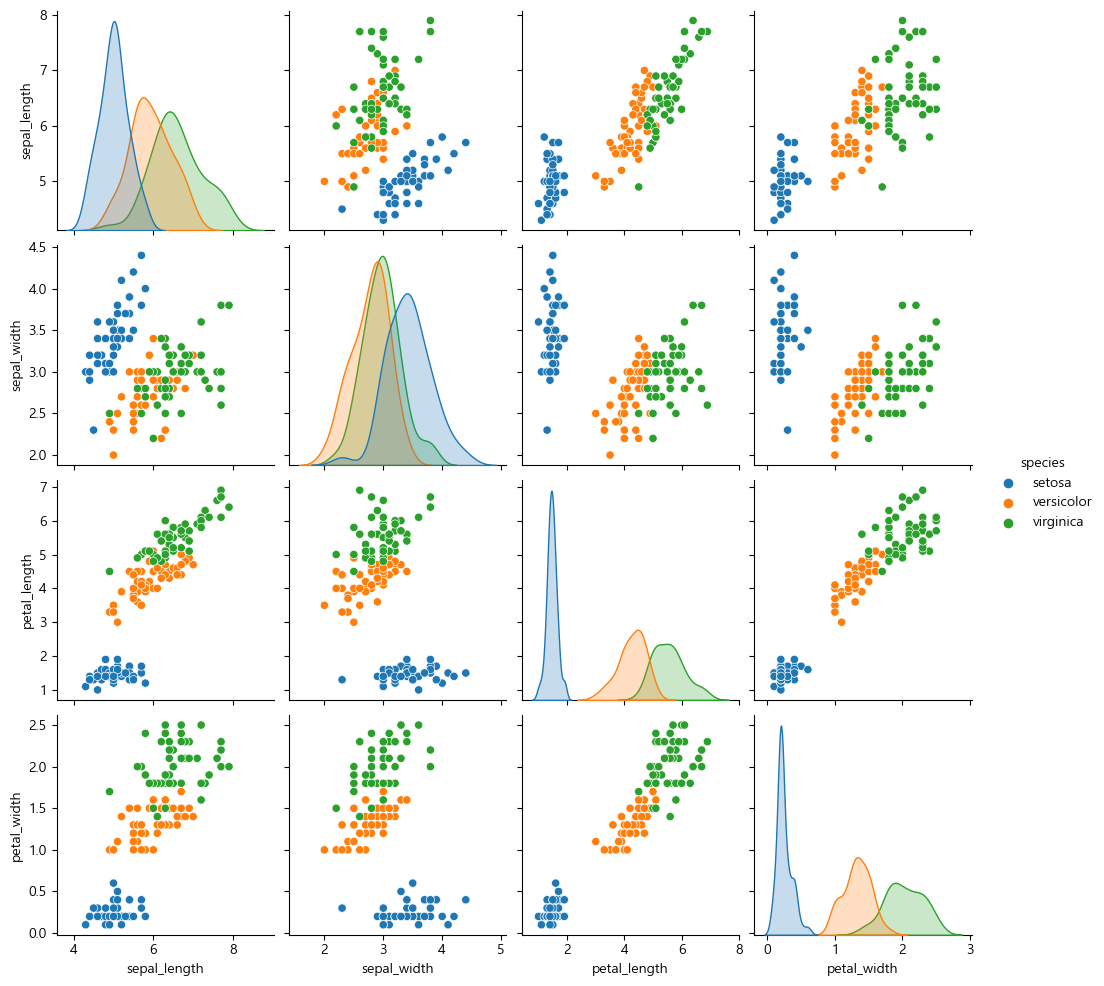

In [13]:
# pair plot
sns.pairplot(data=iris, hue='species');

- 다차원 카테고리 데이터

In [18]:
# 타이타닉호의 선실별 남/녀 승객수의 생존수
titanic.groupby(['class', 'sex'])[['survived']].count()

survived
class  sex             
First  female        94
       male         122
Second female        76
       male         108
Third  female       144
       male         347

In [50]:
dt = titanic.pivot_table('survived', 'class', 'sex', 'count')
dt

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


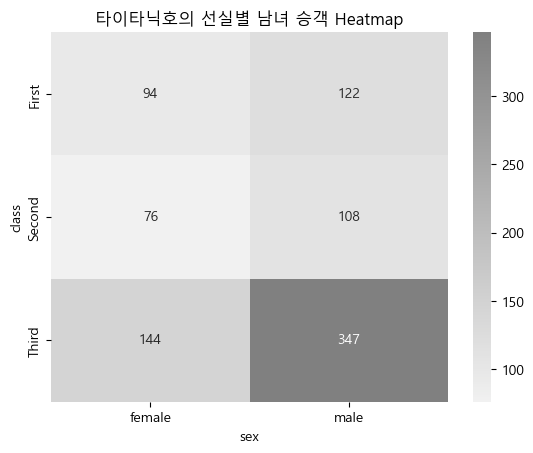

In [53]:
sns.heatmap(dt, cmap=sns.light_palette('gray', as_cmap=True), annot=True, fmt='d')       # cmap = color map
plt.title('타이타닉호의 선실별 남녀 승객 Heatmap');

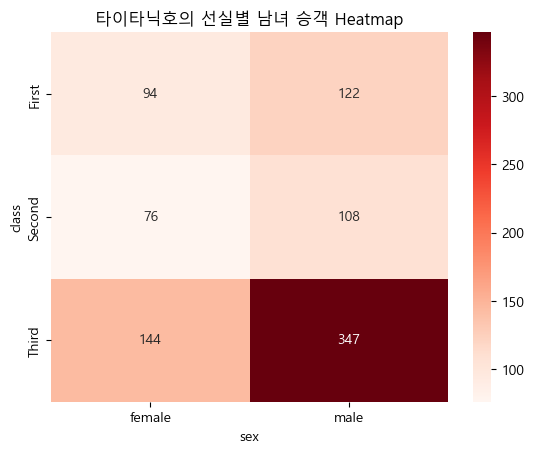

In [55]:
sns.heatmap(dt, cmap='Reds', annot=True, fmt='d')   # annot=True, fmt='d' : 각 셀의 값 표기 유무, 그값의 데이터 타입 설정
plt.title('타이타닉호의 선실별 남녀 승객 Heatmap');

In [25]:
flights.tail()

,year,month,passengers
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
143,1960,Dec,432


C:\Users\human\AppData\Local\Temp\ipykernel_5920\1660039067.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  passengers = flights.pivot('year', 'month', 'passengers')


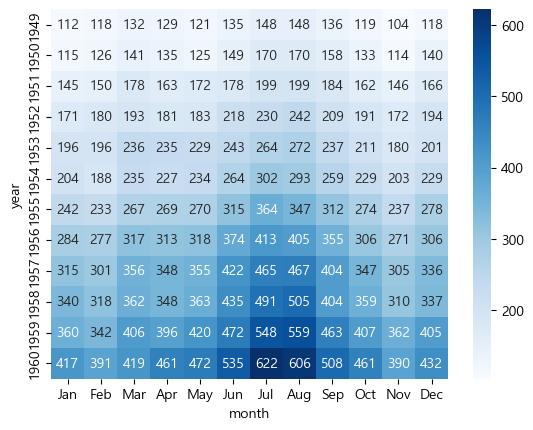

In [26]:
# 연도별, 월별 비행기 승객수
passengers = flights.pivot('year', 'month', 'passengers')
sns.heatmap(passengers, cmap='Blues', annot=True, fmt='d')
plt.show()

- 다차원 복합 데이터 - barplot

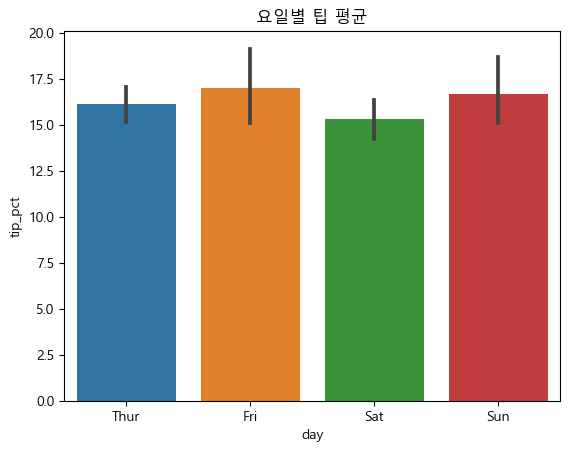

In [26]:
tips['tip_pct'] = (tips.tip / tips.total_bill * 100).round(2)       # 꼬리 : 평균의 신뢰구간
sns.barplot(tips, x='day', y='tip_pct')
plt.title('요일별 팁 평균');

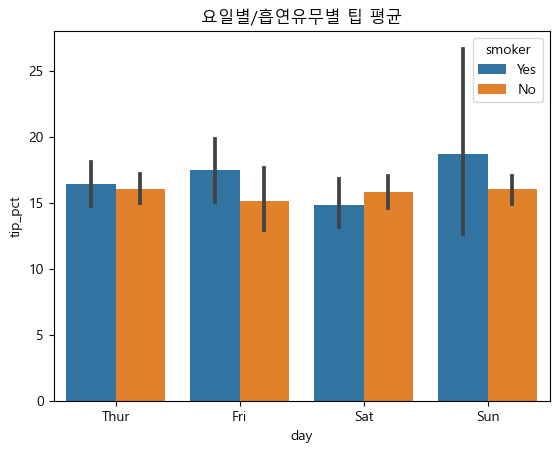

In [27]:
sns.barplot(tips, x='day', y='tip_pct', hue='smoker')
plt.title('요일별/흡연유무별 팁 평균');

In [28]:
###########################################################
mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [36]:
# 제조사별 평균 mpg
mpg['manufacturer'] = mpg.name.apply(lambda x: x.split()[0])
mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,ford
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,vw
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,dodge
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,ford
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10,chevy


In [29]:
mpg.tail(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [30]:
mpg['manufacturer'] = mpg.name.apply(lambda x: x.split()[0])
mpg.tail(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,dodge
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,ford
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10,chevy


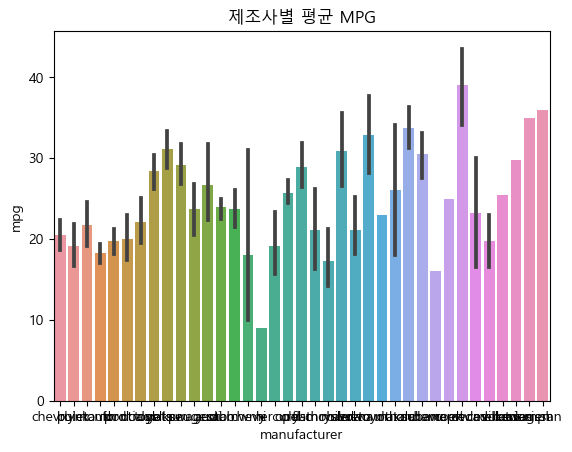

In [37]:
sns.barplot(mpg, x='manufacturer', y='mpg')
plt.title('제조사별 평균 MPG');

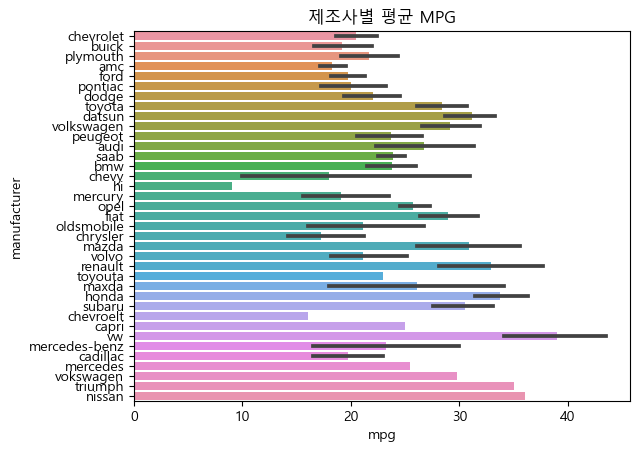

In [38]:
sns.barplot(mpg, y='manufacturer', x='mpg')
plt.title('제조사별 평균 MPG');

- boxplot

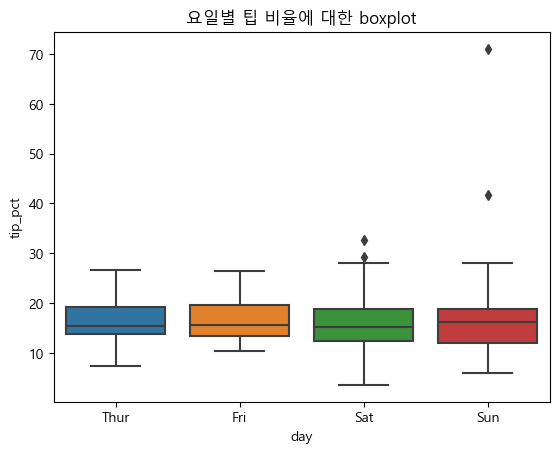

In [39]:
# 요일별 팁의 비율
sns.boxplot(tips, x='day', y='tip_pct')
plt.title('요일별 팁 비율에 대한 boxplot');

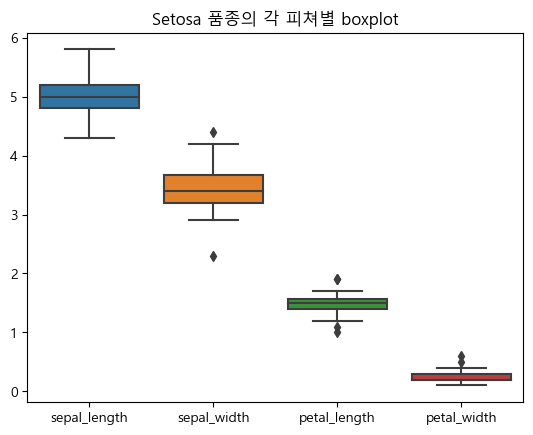

In [41]:
# Iris data
sns.boxplot(iris[iris.species == 'setosa'])
plt.title('Setosa 품종의 각 피쳐별 boxplot');

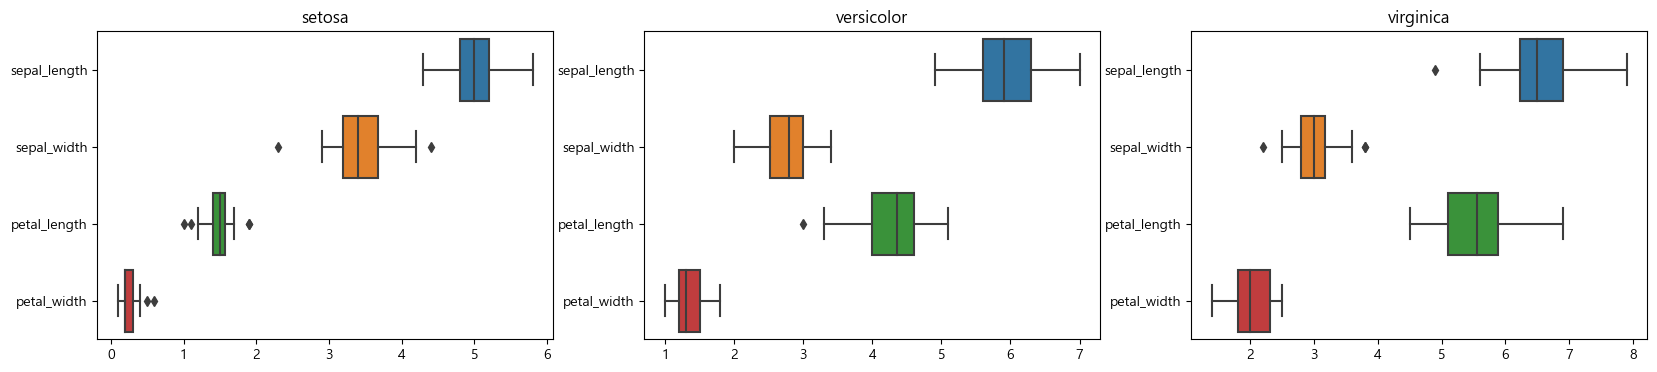

In [45]:
# Iris 모든 품종별 각 피처들의 boxplot
plt.figure(figsize=(20, 4))
for i, species in enumerate(iris.species.unique()):
    plt.subplot(1, 3, i+1)
    sns.boxplot(iris[iris.species == species], orient='horizontal')
    plt.title(species)
plt.show()

- regplot(regression plot)

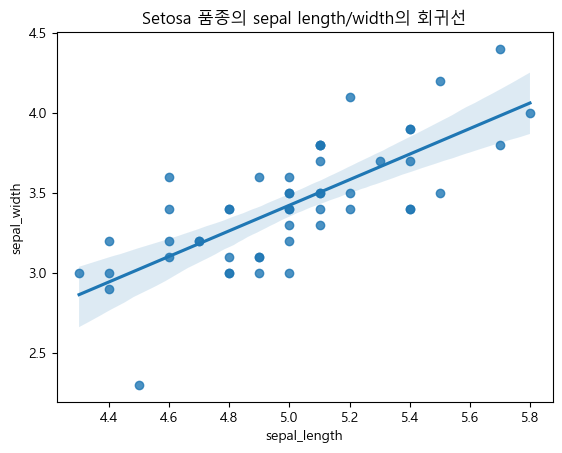

In [47]:
sns.regplot(data=iris[iris.species == 'setosa'], x='sepal_length', y='sepal_width')
plt.title('Setosa 품종의 sepal length/width의 회귀선');

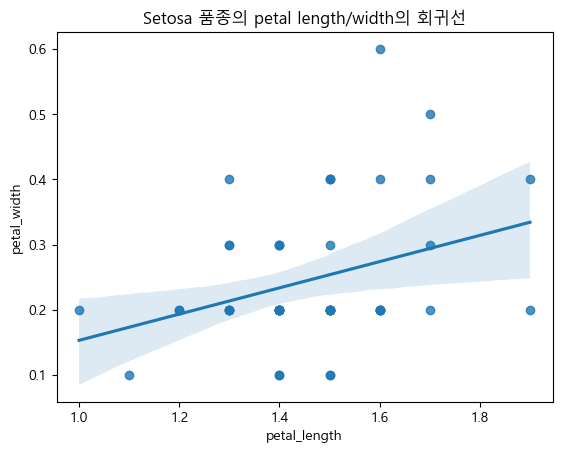

In [48]:
sns.regplot(data=iris[iris.species == 'setosa'], x='petal_length', y='petal_width')
plt.title('Setosa 품종의 petal length/width의 회귀선');